In [ ]:
#Danny Mendelson and Mateo Heitner: House Price Modeling

#Importing Library used for modelling and eda
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,12

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer


from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

#google drive linkage
train = pd.read_csv(f"/content/drive/MyDrive/Machine Learning Final/train.csv")
test =  pd.read_csv(f"/content/drive/MyDrive/Machine Learning Final/test.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 0, 'SalePrice')

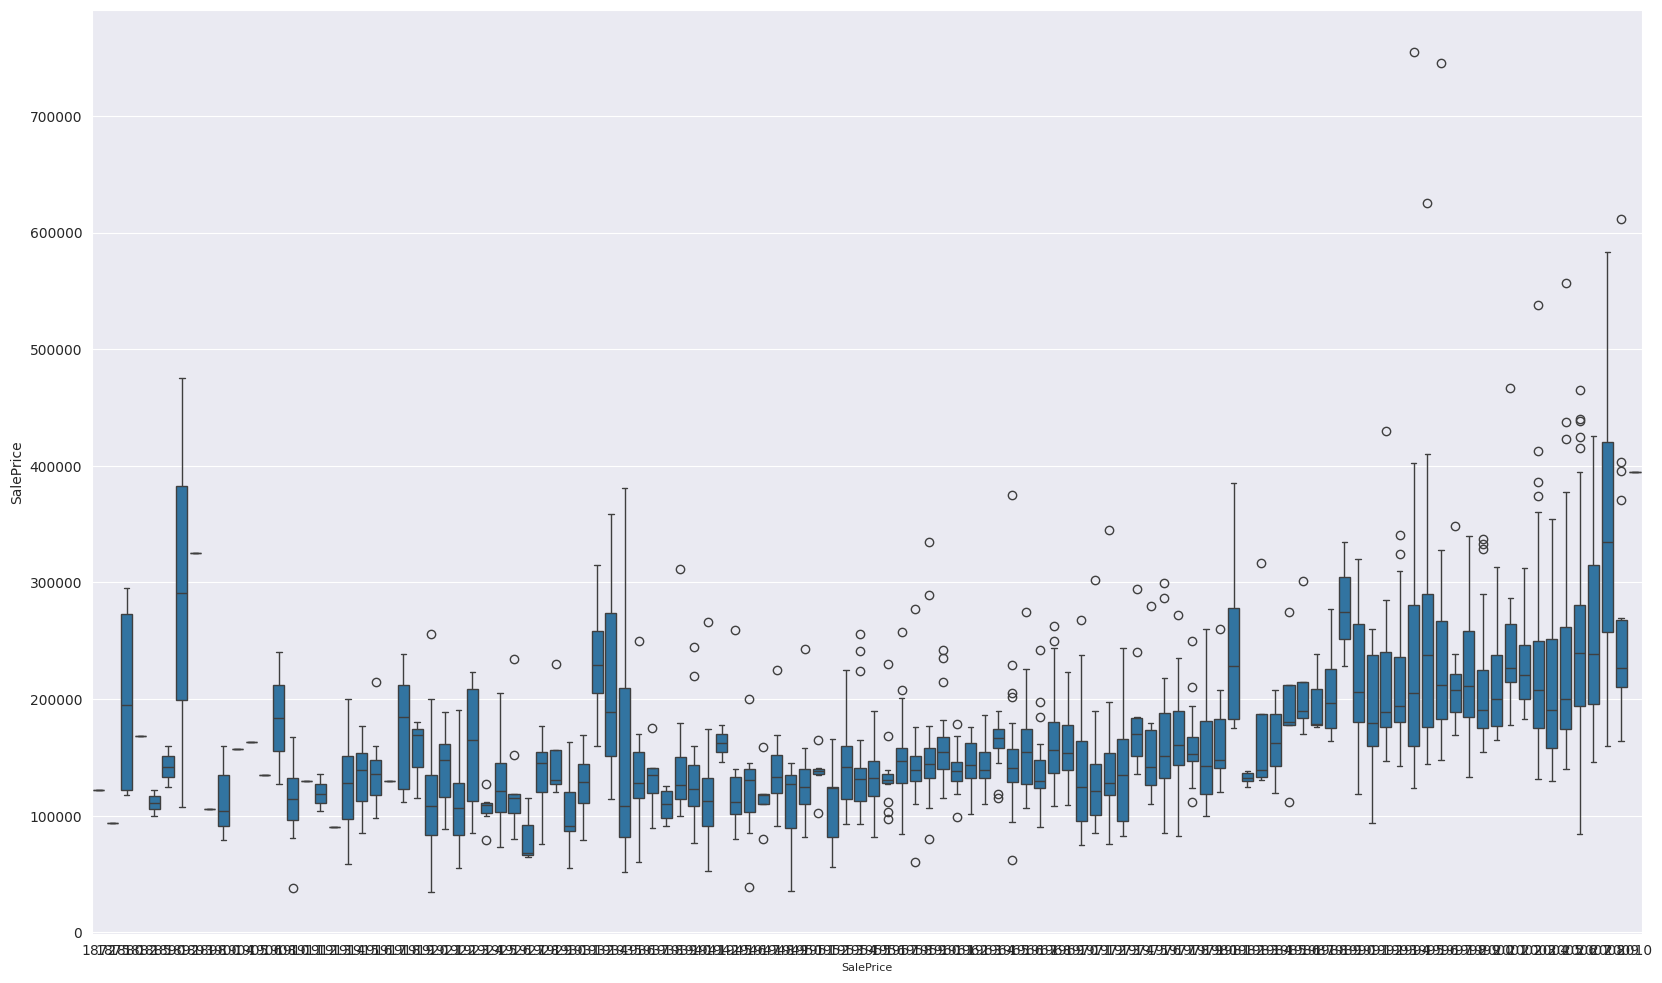

In [ ]:
#plotting year built vs sale price
sns.boxplot(x=train.YearBuilt, y=train.SalePrice)
plt.xlabel("SalePrice", fontsize=8)

(0.0, 800000.0)

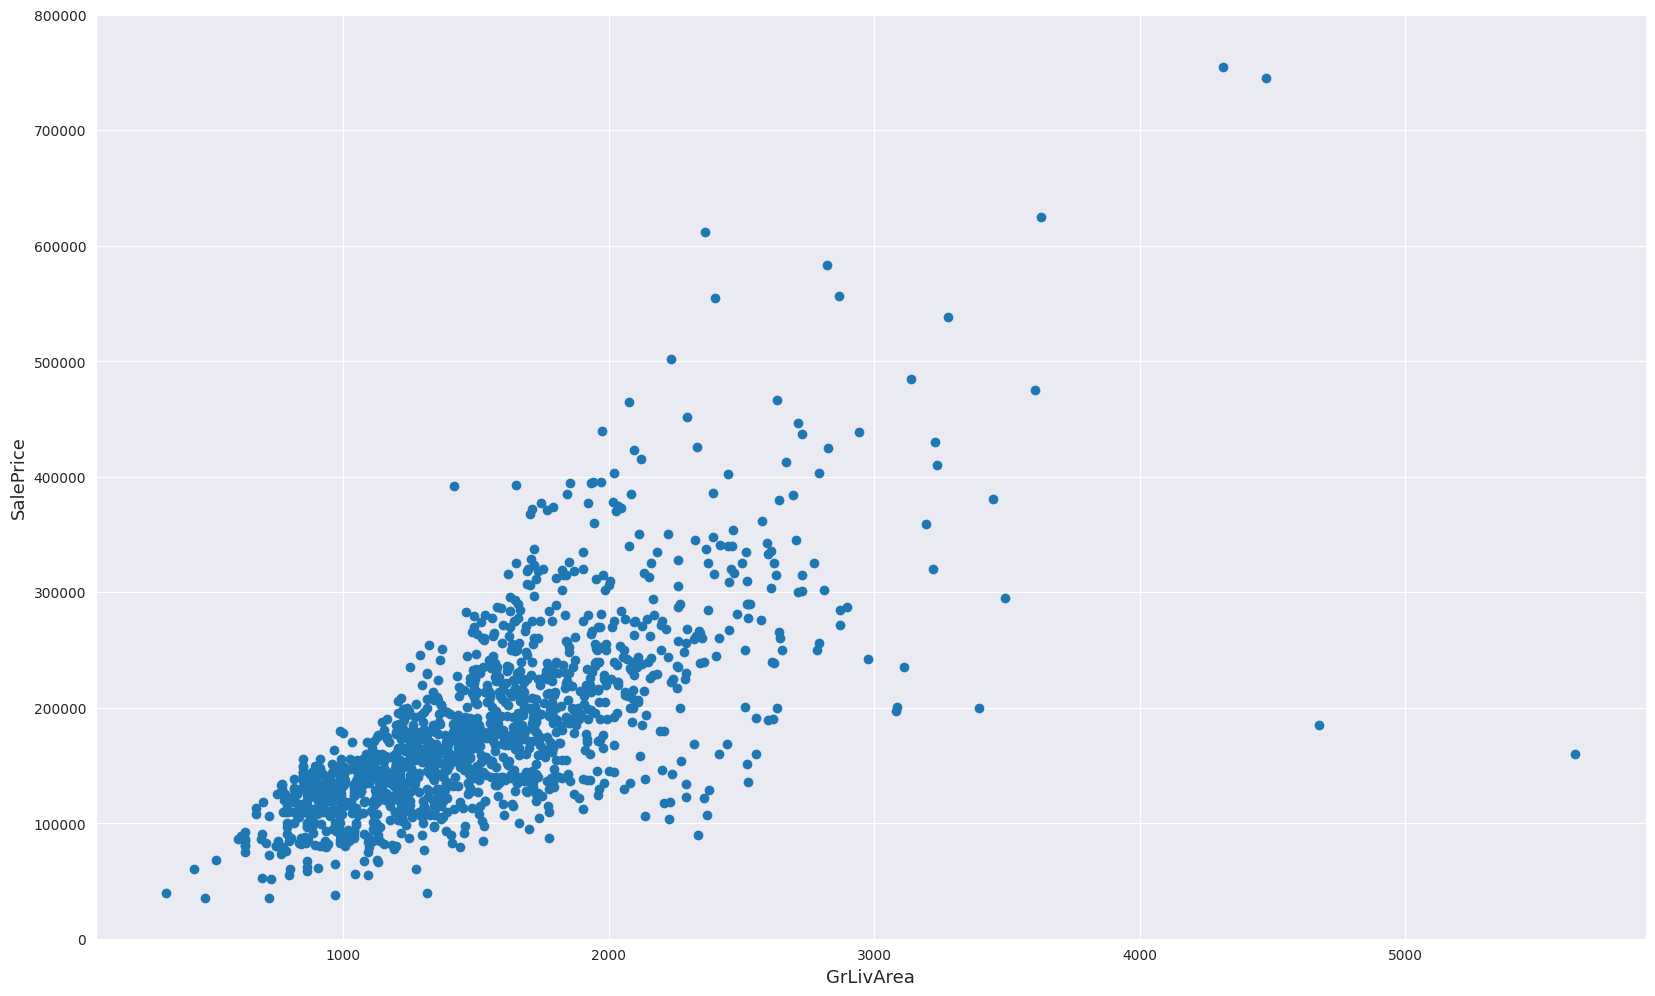

In [ ]:
#Plotting living area vs sale price
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [ ]:
#traning living room data vs sale price to create table
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)

In [ ]:
#showcase table data from trainage
full=pd.concat([train,test], ignore_index=True)
full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2913,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2914,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2915,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [ ]:
#column and rows of data through shape
full.drop(['Id'],axis=1, inplace=True)  #drop id from our dataset
full.shape

(2917, 80)

In [ ]:
#summing up data values with different characteristics
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

,0
PoolQC,2908
MiscFeature,2812
Alley,2719
Fence,2346
MasVnrType,1766
SalePrice,1459
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageYrBlt,159


In [ ]:
#displaying neighborhood vs lot frontage
full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn        46.900000   43.0    20
Blueste        27.300000   24.0    10
BrDale         21.500000   21.0    30
BrkSide        55.789474   51.0    95
ClearCr        88.150000   80.5    20
CollgCr        71.336364   70.0   220
Crawfor        69.951807   70.0    83
Edwards        65.153409   64.5   176
Gilbert        74.207207   64.0   111
IDOTRR         62.241379   60.0    87
MeadowV        25.606061   21.0    33
Mitchel        75.144444   74.0    90
NAmes          75.210667   73.0   375
NPkVill        28.142857   24.0    21
NWAmes         81.517647   80.0    85
NoRidge        91.629630   89.0    54
NridgHt        84.184049   92.0   163
OldTown        61.777293   60.0   229
SWISU          59.068182   60.0    44
Sawyer         74.551020   72.0    98
SawyerW        70.669811   67.0   106
Somerst        64.549383   72.5   162
StoneBr        62.173913   60.0    46
Timber         81.157895   82.0    57
Veenker        72.000000   80.0    16

In [ ]:
full["LotAreaCut"] = pd.qcut(full.LotArea,10)

In [ ]:
#lot area (instead of neighborhoods) tabled against frontage
full.groupby(['LotAreaCut'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4921.8]    35.741036   34.0   251
(4921.8, 7007.2]      55.460674   52.0   267
(7007.2, 7949.0]      62.959839   62.0   249
(7949.0, 8740.4]      67.113725   65.0   255
(8740.4, 9452.0]      69.959184   70.0   245
(9452.0, 10148.8]     73.988235   75.0   255
(10148.8, 11000.0]    73.636364   75.0   253
(11000.0, 12196.8]    83.371681   82.0   226
(12196.8, 14285.8]    84.973684   85.0   228
(14285.8, 215245.0]   92.846535   90.0   202

In [ ]:
# Fill missing values in the 'LotFrontage' column with the median values for similar properties, grouped by 'LotAreaCut' and 'Neighborhood'.
full['LotFrontage'] = full.groupby(['LotAreaCut', 'Neighborhood'])['LotFrontage'] \
    .transform(lambda x: x.fillna(x.median()))

In [ ]:
# Fill missing values in the 'LotFrontage' column with the median values for similar properties, grouped by 'LotAreaCut'.
full['LotFrontage'] = full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Fill missing values in specified columns with 0, as these likely represent absence or non-applicability of the feature.
cols = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    full[col].fillna(0, inplace=True)

In [ ]:
# Fill missing values in specified columns with "None", indicating absence or non-applicability of the feature.
cols1 = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond",
         "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual",
         "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    full[col].fillna("None", inplace=True)

In [ ]:
# Fill missing values in specified columns with the mode (most frequent value) of each column, ensuring consistency in categorical data.
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical",
         "KitchenQual", "SaleType", "Exterior1st", "Exterior2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

In [ ]:
# Identify columns with missing values by summing the number of null entries and filtering for columns with more than 0 missing values.
full.isnull().sum()[full.isnull().sum() > 0]

,0
SalePrice,1459


In [ ]:
# Convert specified numerical columns to string data type to treat them as categorical features.
NumStr = ["MSSubClass", "BsmtFullBath", "BsmtHalfBath", "HalfBath", "BedroomAbvGr",
          "KitchenAbvGr", "MoSold", "YrSold", "YearBuilt", "YearRemodAdd",
          "LowQualFinSF", "GarageYrBlt"]
for col in NumStr:
    full[col] = full[col].astype(str)

In [ ]:
# Group the dataset by 'MSSubClass' and calculate the mean, median, and count of 'SalePrice' for each group.
full.groupby(['MSSubClass'])[['SalePrice']].agg(['mean', 'median', 'count'])

SalePrice                
                     mean    median count
MSSubClass                               
120         200779.080460  192000.0    87
150                   NaN       NaN     0
160         138647.380952  146000.0    63
180         102300.000000   88500.0    10
190         129613.333333  128250.0    30
20          185224.811567  159250.0   536
30           95829.724638   99900.0    69
40          156125.000000  142500.0     4
45          108591.666667  107500.0    12
50          143302.972222  132000.0   144
60          240403.542088  216000.0   297
70          166772.416667  156000.0    60
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52

In [ ]:
def map_values():
    # Map categorical data to ordinal values for better compatibility with machine learning algorithms.

    # Map MSSubClass values to ordinal categories based on property classification.
    full["oMSSubClass"] = full.MSSubClass.map({
        '180': 1,  # Properties not easily categorized
        '30': 2, '45': 2,  # Smaller residential properties
        '190': 3, '50': 3, '90': 3,  # Larger residential properties
        '85': 4, '40': 4, '160': 4,  # Mixed-use or older properties
        '70': 5, '20': 5, '75': 5, '80': 5, '150': 5,  # Standard single-family homes
        '120': 6, '60': 6  # High-end properties
    })

    # Map MSZoning values to ordinal categories based on zoning classifications.
    full["oMSZoning"] = full.MSZoning.map({
        'C (all)': 1,  # Commercial zones
        'RH': 2, 'RM': 2,  # High and medium-density residential
        'RL': 3,  # Low-density residential
        'FV': 4  # Floating Village residential
    })

    # Map Neighborhood values to ordinal categories based on perceived neighborhood desirability.
    full["oNeighborhood"] = full.Neighborhood.map({
        'MeadowV': 1,  # Least desirable neighborhoods
        'IDOTRR': 2, 'BrDale': 2,  # Below-average neighborhoods
        'OldTown': 3, 'Edwards': 3, 'BrkSide': 3,  # Average neighborhoods
        'Sawyer': 4, 'Blueste': 4, 'SWISU': 4, 'NAmes': 4,  # Slightly above average
        'NPkVill': 5, 'Mitchel': 5,  # Moderate neighborhoods
        'SawyerW': 6, 'Gilbert': 6, 'NWAmes': 6,  # Above-average neighborhoods
        'Blmngtn': 7, 'CollgCr': 7, 'ClearCr': 7, 'Crawfor': 7,  # High-end neighborhoods
        'Veenker': 8, 'Somerst': 8, 'Timber': 8,  # Upper-tier neighborhoods
        'StoneBr': 9,  # Prestigious neighborhood
        'NoRidge': 10, 'NridgHt': 10  # Most prestigious neighborhoods
    })

    # Map Condition1 values to ordinal categories based on proximity to certain conditions.
    full["oCondition1"] = full.Condition1.map({
        'Artery': 1,  # Near major roads
        'Feedr': 2, 'RRAe': 2,  # Near feeder roads or railroads
        'Norm': 3, 'RRAn': 3,  # Normal or railroad-adjacent
        'PosN': 4, 'RRNe': 4,  # Positive influence or near a railroad
        'PosA': 5, 'RRNn': 5  # Very positive influence
    })

    # Map BldgType values to ordinal categories based on building types.
    full["oBldgType"] = full.BldgType.map({
        '2fmCon': 1, 'Duplex': 1, 'Twnhs': 1,  # Multifamily or townhomes
        '1Fam': 2, 'TwnhsE': 2  # Single-family or end-unit townhomes
    })

    # Map HouseStyle values to ordinal categories based on architectural style.
    full["oHouseStyle"] = full.HouseStyle.map({
        '1.5Unf': 1,  # 1.5-story unfinished
        '1.5Fin': 2, '2.5Unf': 2, 'SFoyer': 2,  # 1.5-story finished or split-level
        '1Story': 3, 'SLvl': 3,  # Single-story or split-level
        '2Story': 4, '2.5Fin': 4  # Two-story or 2.5-story finished
    })

    # Repeat for all other features with meaningful mappings, maintaining the structure.
    # This ensures that categorical values are represented as integers, preserving ordinal relationships.

    # Return a confirmation message after processing.
    return "Done!"


In [ ]:
map_values()

'Done!'

In [ ]:
#these two columns cause issues so we dropped them
full.drop("LotAreaCut",axis=1,inplace=True)
full.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        lab=LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

In [ ]:
#Apply log1p to the skewed features, then get_dummies.

class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [ ]:
# build pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [ ]:
# save the original data for later use
full2 = full.copy()

In [ ]:
#fits the data
data_pipe = pipe.fit_transform(full2)
data_pipe

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,9.042040,7,5,110,53,5.283204,706.0,0.0,150.0,...,False,False,False,True,False,False,False,False,True,False
1,80.0,9.169623,6,8,83,26,0.000000,978.0,0.0,284.0,...,False,False,False,True,False,False,False,False,True,False
2,68.0,9.328212,7,5,108,52,5.093750,486.0,0.0,434.0,...,False,False,False,True,False,False,False,False,True,False
3,60.0,9.164401,7,5,25,20,0.000000,216.0,0.0,540.0,...,False,False,False,True,True,False,False,False,False,False
4,84.0,9.565284,8,5,107,50,5.860786,655.0,0.0,490.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,21.0,7.568896,4,7,77,20,0.000000,0.0,0.0,546.0,...,False,False,False,True,False,False,False,False,True,False
2913,21.0,7.546974,4,5,77,20,0.000000,252.0,0.0,294.0,...,False,False,False,True,True,False,False,False,False,False
2914,160.0,9.903538,5,7,67,46,0.000000,1224.0,0.0,0.0,...,False,False,False,True,True,False,False,False,False,False
2915,62.0,9.253591,5,5,99,42,0.000000,337.0,0.0,575.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
scaler = RobustScaler()
#training the data
n_train=train.shape[0]

#more training
X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [ ]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)

Lasso(alpha=0.001)

In [ ]:
#sorting my feature importance
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
GrLivArea,0.108725
OverallQual,0.104060
2ndFlrSF,0.077616
YearBuilt,0.073063
TotalBsmtSF,0.056593
...,...
BsmtFullBath_0.0,-0.018108
KitchenAbvGr_2,-0.028659
CentralAir_N,-0.038952
SaleCondition_Abnorml,-0.058652


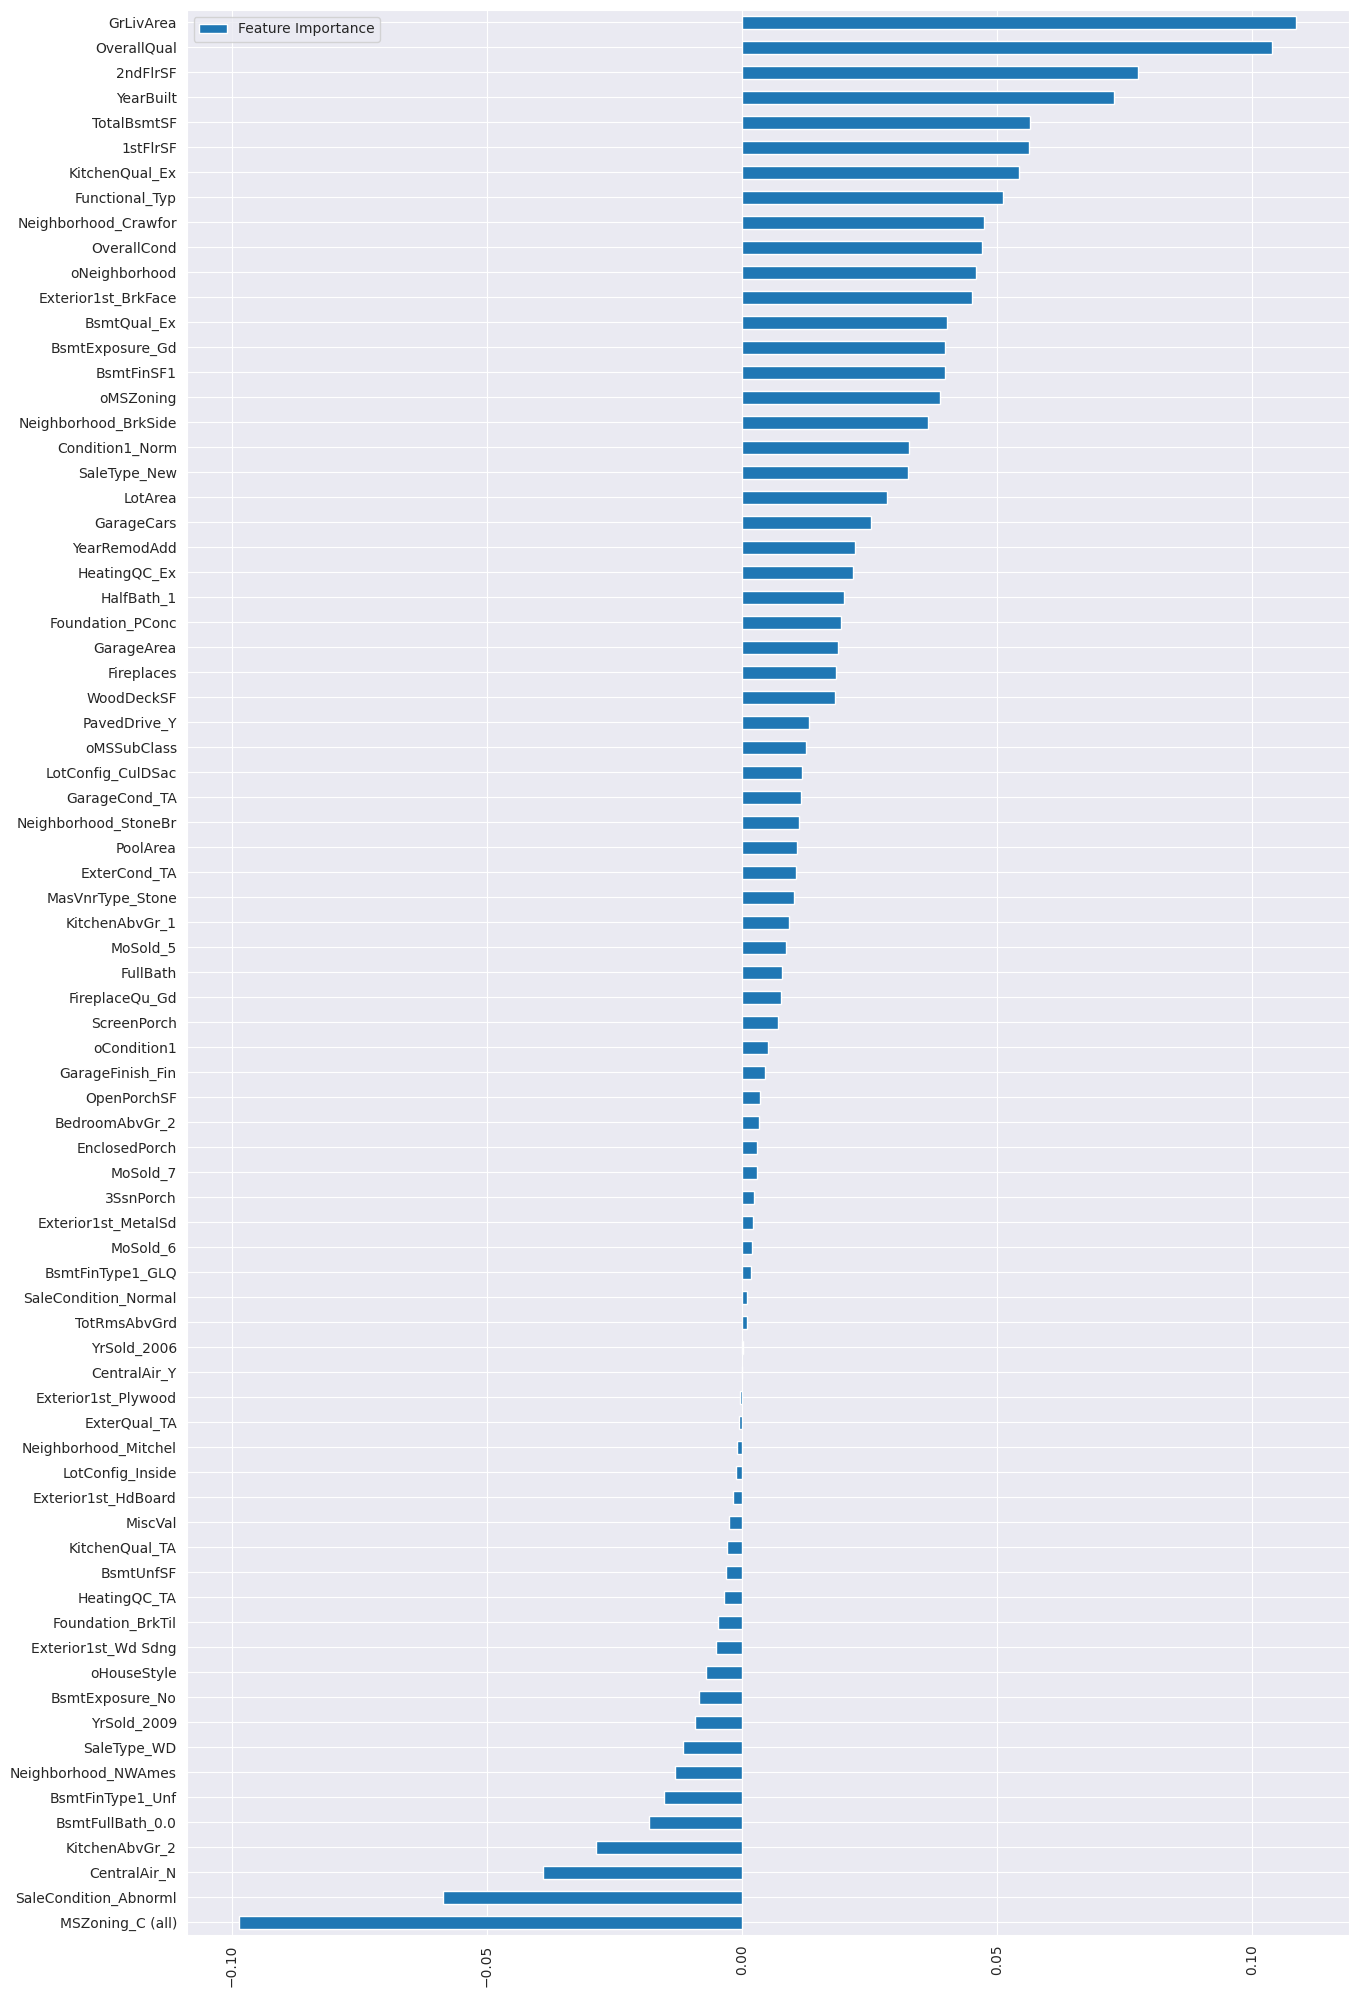

In [ ]:
#plotting all the data by importance
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [ ]:
#creating c,ass of the base estimator and the transformer
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]

        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]

            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]

            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]


            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]


            return X

In [ ]:
#creating poipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [ ]:
#filling data
full['oFunctional'] = np.nan
full_pipe = pipe.fit_transform(full)
full_pipe

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,9.042040,7,5,110,53,5.283204,706.0,0.0,150.0,...,False,False,False,True,False,False,False,False,True,False
1,80.0,9.169623,6,8,83,26,0.000000,978.0,0.0,284.0,...,False,False,False,True,False,False,False,False,True,False
2,68.0,9.328212,7,5,108,52,5.093750,486.0,0.0,434.0,...,False,False,False,True,False,False,False,False,True,False
3,60.0,9.164401,7,5,25,20,0.000000,216.0,0.0,540.0,...,False,False,False,True,True,False,False,False,False,False
4,84.0,9.565284,8,5,107,50,5.860786,655.0,0.0,490.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,21.0,7.568896,4,7,77,20,0.000000,0.0,0.0,546.0,...,False,False,False,True,False,False,False,False,True,False
2913,21.0,7.546974,4,5,77,20,0.000000,252.0,0.0,294.0,...,False,False,False,True,True,False,False,False,False,False
2914,160.0,9.903538,5,7,67,46,0.000000,1224.0,0.0,0.0,...,False,False,False,True,True,False,False,False,False,False
2915,62.0,9.253591,5,5,99,42,0.000000,337.0,0.0,575.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
#more training
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [ ]:

pca = PCA(n_components=410)

In [ ]:
#scaling data
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)
X_scaled.shape, test_X_scaled.shape

((1458, 408), (1459, 408))

In [ ]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [ ]:
#creating the models
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [ ]:
#iterating through and naming and running
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

In [ ]:
#creating grid class
class grid():
    def __init__(self,model):
        self.model = model

    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [ ]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

{'alpha': 0.0009, 'max_iter': 10000} 0.11156892535365194
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.111897        0.001574
1  {'alpha': 0.0005, 'max_iter': 10000}         0.111768        0.001513
2  {'alpha': 0.0007, 'max_iter': 10000}         0.111681        0.001457
3  {'alpha': 0.0009, 'max_iter': 10000}         0.111569        0.001467


In [ ]:
#creating the grid for ridge model
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 40} 0.1104649213952751
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.110485        0.001435
1  {'alpha': 40}         0.110465        0.001426
2  {'alpha': 45}         0.110468        0.001419
3  {'alpha': 50}         0.110487        0.001415
4  {'alpha': 55}         0.110519        0.001412
5  {'alpha': 60}         0.110561        0.001409
6  {'alpha': 65}         0.110611        0.001407
7  {'alpha': 70}         0.110667        0.001406
8  {'alpha': 80}         0.110791        0.001405
9  {'alpha': 90}         0.110929        0.001405


In [ ]:
#creating grid for SVR model
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

In [ ]:
#creating grid for kernel ridge model
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)

In [ ]:
#creating  grid for elastic net model
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

NameError: name 'grid' is not defined

In [ ]:
#creating average weight class with base estimator and regressor mixin
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight

    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self

    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [ ]:
#creating models
lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

In [ ]:
# assign weights based on their gridsearch score
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

In [ ]:
#creating weighted average
weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

In [ ]:
#getting score
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

In [ ]:
# Averaging the two models
weight_avg = AverageWeight(mod = [svr,ker],weight=[0.5,0.5])
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

In [ ]:
#creating stack based on base estimator, regressor mixin, transformer mixin
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)

    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))

        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])

        self.meta_model.fit(oof_train,y)
        return self

    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1)
                                      for single_model in self.saved_model])
        return self.meta_model.predict(whole_test)

    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [ ]:
#dooing imputer on x scaled and then y log values
a = SimpleImputer().fit_transform(X_scaled)
b = SimpleImputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [ ]:
#creating stakc model passing in lasso ridge svr ker ela and bay
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [ ]:
#making score
score = rmse_cv(stack_model,a,b)
print(score.mean())

In [ ]:
#more trainig and testing
X_train_stack, X_test_stack = stack_model.get_oof(a,b,test_X_scaled)

In [ ]:
#more training
X_train_stack.shape, a.shape

In [ ]:
#more training
X_train_add = np.hstack((a,X_train_stack))

In [ ]:
#more train and test
X_test_add = np.hstack((test_X_scaled,X_test_stack))
X_train_add.shape, X_test_add.shape

In [ ]:
#getting new score
score = rmse_cv(stack_model,X_train_add,b)
print(score.mean())

In [ ]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)
stack_model.fit(a,b)

In [ ]:
pred = np.exp(stack_model.predict(test_X_scaled))
pred

In [ ]:
#exporting result to csv
result=pd.DataFrame({'Id':test.Id, 'SalePrice':pred})
result.to_csv("submission.csv",index=False